<a href="https://colab.research.google.com/github/Nelsontmiranda/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - *Sydney***
![](https://bityli.com/Gdj4L) 
---



O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.
<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade Sydney, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados nesse projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/index.html)

Para a análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.cvs` - *Summary information and metrics for listings in Sydney (good for visualisations).* 

O dataset desse projeto foi compilado em 09/05/2020.

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/australia/nsw/sydney/2020-05-09/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,64,2,196,2020-03-13,1.54,1,363
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14315,2,526,2019-09-22,4.41,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.04,2,141
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,100,2,364,2020-03-17,3.64,1,344
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,131,3,76,2020-01-03,0.65,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 37562
Variáveis:	 15


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% de valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 27% das linhas.
* As variáveis `name` e `host_name` tem menos que 0,1% de valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.276476
last_review                       0.276476
name                              0.000319
host_name                         0.000080
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição de variáveis, irei plotar o histograma.

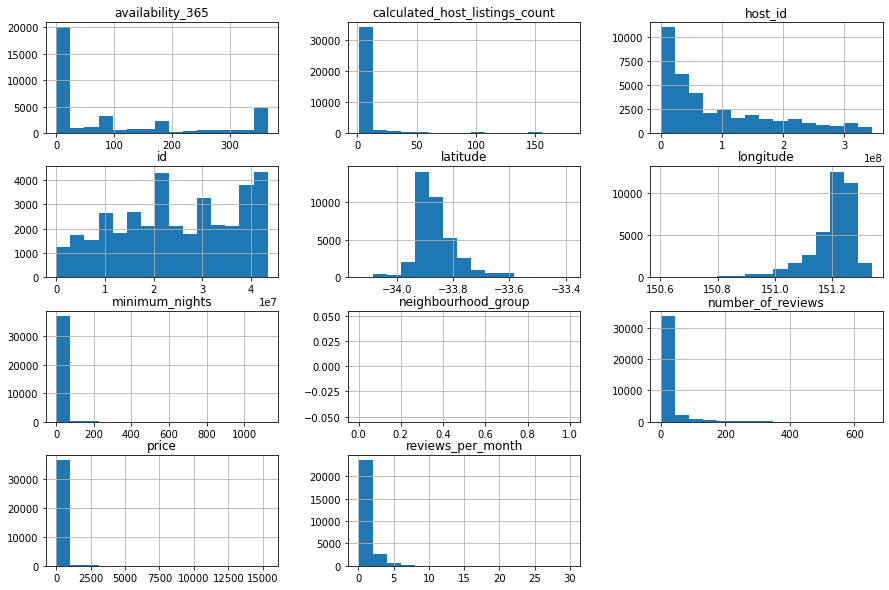

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

###**Q4. Há outliers presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,37562.000000,37562.000000,37562.000000,27177.000000,37562.000000,37562.000000
mean,228.379293,5.431899,15.119349,0.856200,7.681487,97.432405
std,456.090669,19.883671,36.374339,1.237286,23.829058,130.455893
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,78.000000,1.000000,0.000000,0.100000,1.000000,0.000000
50%,130.000000,2.000000,2.000000,0.340000,1.000000,1.000000
75%,219.000000,5.000000,11.000000,1.090000,2.000000,179.000000
max,15367.000000,1125.000000,655.000000,30.000000,179.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável price possui 75% do seu valor abaixo de 219, porém o valor máximo é de 15367.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

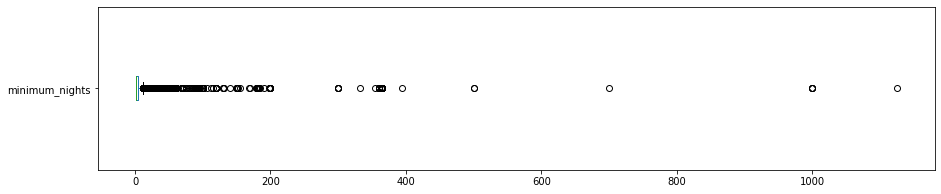

minimum_nights: valores acima de 30:
610 entradas
1.6240%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

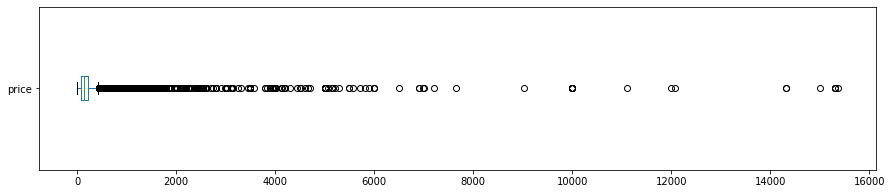


price: valores acima de 1500
564 entradas
1.5015%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

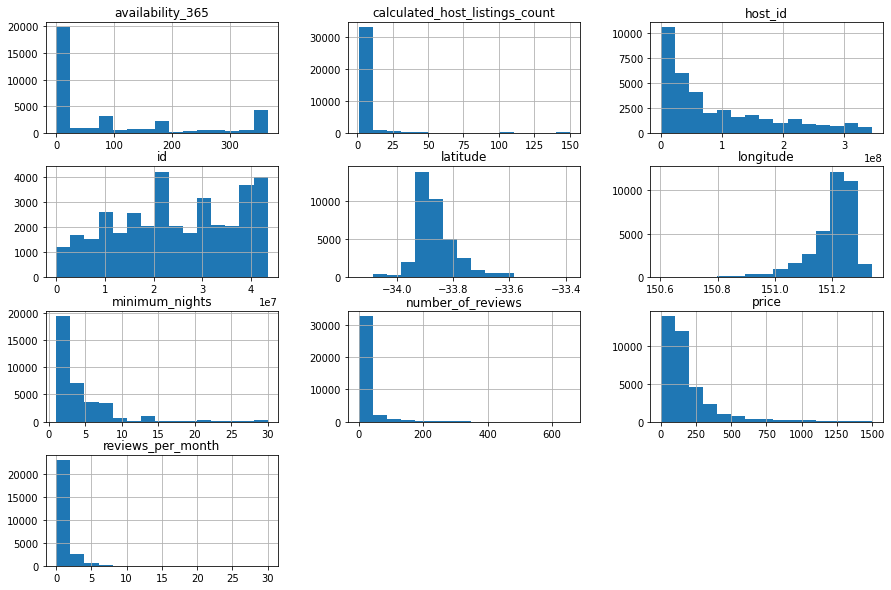

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**
Abaixo está o valor médio dos aluguéis no airbnb em Sydney.

In [0]:
# ver a média da coluna `price``
print('A média dos preços de aluguel é de aproximadamente ${:.0f} por dia'.format(df.price.mean()))

A média dos preços de aluguel é de aproximadamente $228 por dia


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

* Podemos notar que o `Entire home/apt` é o tipo de aluguel mais ofertado, com mais de 60%.
* Os tipos `Shared room` e `Hotel room`, somados, representam menos de 3%. 


In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22229
Private room       13184
Shared room          701
Hotel room           278
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.610821
Private room       0.362277
Shared room        0.019262
Hotel room         0.007639
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Sydney?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) de acordo com o preço de locação.

* A região de Pittwater é a que possuia a média de aluguel mais cara, porém as 10 regiões com as maiores médias não tem uma diferença de valor muito grande.

* Metade dos 10 bairros com a média de aluguel mais cara, são bairros com praias, bem próximas. 

* Nenhum dos 10 bairros abaixo, fica a mais de 40km de distância do centro comercial de Sydney.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           448.510332
Mosman              324.550209
Hunters Hill        287.057692
Manly               280.769646
Warringah           252.346636
Woollahra           236.302746
Waverley            217.371274
Sutherland Shire    206.089606
Leichhardt          204.352809
Lane Cove           201.375817
Name: price, dtype: float64

* Porém devemos ficar atentos se algum desses bairros possuem poucos imóveis, e com isso causar uma discrepância nos dados. Por exemplo, o bairo Hunters Hill, que está em 3 na lista, tem apenas 52 imóveis, em um dataset de mais de 37 mil.

In [0]:
# Conferindo a quantidade de imóveis em Hunters Hill
df_clean[df_clean.neighbourhood == "Hunters Hill"].shape

(52, 15)

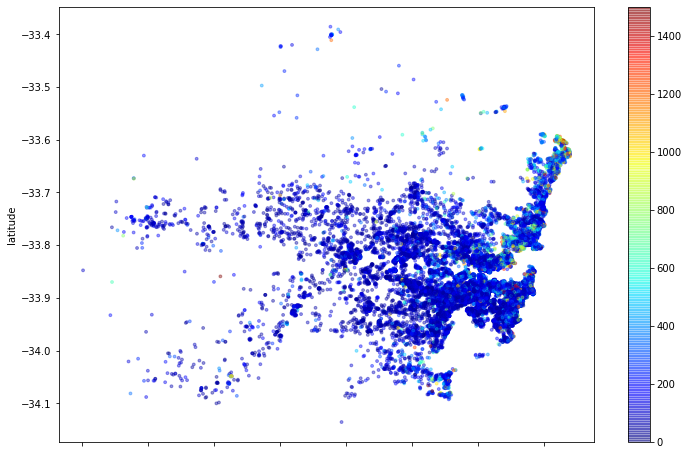

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Podemos ver que os pontos formam uma área bem similar com a área do mapa de Sydney. Nota-se claramente que a região da borda, onde ficam as praias, temos uma maior quantidade de pontos vermelhos, que são os imóveis com os alugéis mais altos.

In [0]:
# Os bairros com maior número de imóveis
df_clean.neighbourhood.value_counts().head(10)

Sydney          9189
Waverley        4999
Randwick        3221
Warringah       1754
Manly           1667
Woollahra       1493
North Sydney    1271
Marrickville    1192
Pittwater       1113
Rockdale         900
Name: neighbourhood, dtype: int64

In [0]:
# A porcentagem referente aos bairros com maior número de imóveis
df_clean.neighbourhood.value_counts().head(10) / df_clean.shape[0] *100

Sydney          25.250055
Waverley        13.736536
Randwick         8.850846
Warringah        4.819741
Manly            4.580677
Woollahra        4.102550
North Sydney     3.492526
Marrickville     3.275445
Pittwater        3.058364
Rockdale         2.473071
Name: neighbourhood, dtype: float64

In [0]:
# Os bairros com menor número de imóveis
df_clean.neighbourhood.value_counts().tail(10)

Strathfield        205
Hurstville         204
City Of Kogarah    203
Penrith            177
Liverpool          152
Campbelltown       118
Holroyd             99
Fairfield           96
Hunters Hill        52
Camden              48
Name: neighbourhood, dtype: int64

## Conclusões


Foi feita uma análise exploratória sobre os dados do airbnb na cidade de Sydney, porém com um dataset resumido. Mesmo assim, podemos notar que:

* O centro comercial de Sydney é onde concentra a maior quantidade de imóveis, com mais de 25%. 
* Dos 10 imóveis com a média de aluguel mais cara, 5 estão também na lista dos 10 bairros com mais imóveis. 
* A região mais próxima a praia tem os imóveis com o aluguel mais caro.